In [1]:
%cd ../

/home/zulqarnain/develop/htfatorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
haxby_db = niidb.FMriActivationsDb('data/haxby_mc_zrest.db')

In [6]:
dtfa = DTFA.DeepTFA([b for b in haxby_db.all() if 'rest' not in b.task], mask='/home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz', num_factors=100, embedding_dim=2)

01/24/2020 18:45:55 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub1_run01_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/24/2020 18:45:56 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub1_run02_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/24/2020 18:45:57 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub1_run03_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/24/2020 18:45:57 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub1_run04_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/24/2020 18:45:58 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub1_run0

01/24/2020 18:46:22 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub4_run02_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/24/2020 18:46:23 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub4_run03_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/24/2020 18:46:24 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub4_run04_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/24/2020 18:46:24 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub4_run05_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/24/2020 18:46:25 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub4_run0

In [7]:
dtfa.num_voxels

32233

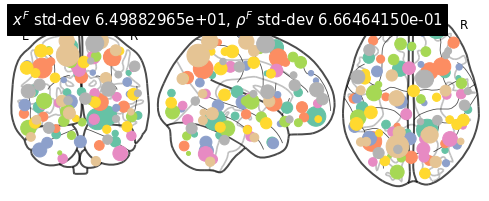

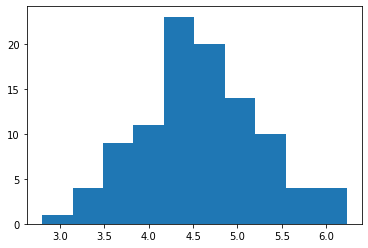

(<nilearn.plotting.displays.OrthoProjector at 0x7f8fd3f65590>,
 tensor([[-50.2199, -24.1086,  15.2065],
         [ 36.8280, -69.0498, -29.3240],
         [ 50.9989,   6.8820,  34.3904],
         [ 28.0288,  58.8817, -10.8258],
         [ -2.7806, -50.4281,  32.7686],
         [-43.3371,  28.4134,  -1.6157],
         [-25.2292, -41.9909, -30.3499],
         [-10.3646,  16.7435,  61.8422],
         [ 60.8480, -26.1925, -10.3833],
         [ 18.1310, -47.6306, -14.1836],
         [  1.3934,  40.1609,  14.4294],
         [-13.7406, -93.1518,  13.7385],
         [ 36.8789,  12.7271, -38.0635],
         [-25.4622, -12.8733, -24.2769],
         [ 36.8135, -62.0282,  46.8319],
         [-40.1841, -59.7533,  39.3908],
         [ 45.8577,  44.1750,  -1.1601],
         [ 20.7454,  14.2420,   3.6296],
         [ 20.1120, -79.8164, -41.9573],
         [-38.7735,  46.3252, -11.7262],
         [-59.1722, -14.6324,  -8.5495],
         [ 33.6781,  19.0582,  51.0459],
         [-13.4452, -43.7174,  67.1

In [8]:
dtfa.visualize_factor_embedding()

In [9]:
dtfa.num_blocks

552

In [10]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-4}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=100,
                    blocks_filter=haxby_db.inference_filter(training=True))

01/24/2020 18:47:14 [Epoch 1] (6935ms) Posterior free-energy 2.90913280e+08 = KL from prior 6.94574062e+05 - log-likelihood -2.90218688e+08
01/24/2020 18:47:14 Saving checkpoint...
01/24/2020 18:47:21 [Epoch 2] (6824ms) Posterior free-energy 2.79611232e+08 = KL from prior 6.47934250e+05 - log-likelihood -2.78963232e+08
01/24/2020 18:47:27 [Epoch 3] (6738ms) Posterior free-energy 2.72255616e+08 = KL from prior 6.12073250e+05 - log-likelihood -2.71643552e+08
01/24/2020 18:47:34 [Epoch 4] (6742ms) Posterior free-energy 2.67244608e+08 = KL from prior 5.82675688e+05 - log-likelihood -2.66661888e+08
01/24/2020 18:47:41 [Epoch 5] (6753ms) Posterior free-energy 2.64114208e+08 = KL from prior 5.63005125e+05 - log-likelihood -2.63551232e+08
01/24/2020 18:47:48 [Epoch 6] (6670ms) Posterior free-energy 2.61477152e+08 = KL from prior 5.43614125e+05 - log-likelihood -2.60933536e+08
01/24/2020 18:47:54 [Epoch 7] (6654ms) Posterior free-energy 2.59804784e+08 = KL from prior 5.28627812e+05 - log-likeli

01/24/2020 18:53:42 [Epoch 59] (6406ms) Posterior free-energy 2.24356192e+08 = KL from prior 7.57632438e+05 - log-likelihood -2.23598560e+08
01/24/2020 18:53:48 [Epoch 60] (6404ms) Posterior free-energy 2.24008880e+08 = KL from prior 7.66522125e+05 - log-likelihood -2.23242384e+08
01/24/2020 18:53:55 [Epoch 61] (6382ms) Posterior free-energy 2.23683152e+08 = KL from prior 7.75895438e+05 - log-likelihood -2.22907232e+08
01/24/2020 18:54:01 [Epoch 62] (6425ms) Posterior free-energy 2.23280688e+08 = KL from prior 7.84881250e+05 - log-likelihood -2.22495840e+08
01/24/2020 18:54:07 [Epoch 63] (6443ms) Posterior free-energy 2.22934576e+08 = KL from prior 7.93843562e+05 - log-likelihood -2.22140736e+08
01/24/2020 18:54:14 [Epoch 64] (6404ms) Posterior free-energy 2.22546592e+08 = KL from prior 8.01966250e+05 - log-likelihood -2.21744640e+08
01/24/2020 18:54:20 [Epoch 65] (6428ms) Posterior free-energy 2.22299184e+08 = KL from prior 8.09034188e+05 - log-likelihood -2.21490144e+08
01/24/2020 18

01/24/2020 19:00:04 [Epoch 117] (6596ms) Posterior free-energy 2.13582064e+08 = KL from prior 9.45293500e+05 - log-likelihood -2.12636720e+08
01/24/2020 19:00:11 [Epoch 118] (6600ms) Posterior free-energy 2.13504208e+08 = KL from prior 9.49558750e+05 - log-likelihood -2.12554624e+08
01/24/2020 19:00:18 [Epoch 119] (6584ms) Posterior free-energy 2.13437072e+08 = KL from prior 9.53729875e+05 - log-likelihood -2.12483328e+08
01/24/2020 19:00:24 [Epoch 120] (6582ms) Posterior free-energy 2.13323264e+08 = KL from prior 9.57874250e+05 - log-likelihood -2.12365392e+08
01/24/2020 19:00:31 [Epoch 121] (6595ms) Posterior free-energy 2.13261680e+08 = KL from prior 9.61930188e+05 - log-likelihood -2.12299712e+08
01/24/2020 19:00:37 [Epoch 122] (6584ms) Posterior free-energy 2.13172352e+08 = KL from prior 9.65015125e+05 - log-likelihood -2.12207312e+08
01/24/2020 19:00:44 [Epoch 123] (6596ms) Posterior free-energy 2.13110720e+08 = KL from prior 9.67892812e+05 - log-likelihood -2.12142864e+08
01/24/

01/24/2020 19:06:31 [Epoch 175] (6740ms) Posterior free-energy 2.10690528e+08 = KL from prior 1.11938212e+06 - log-likelihood -2.09571104e+08
01/24/2020 19:06:38 [Epoch 176] (6753ms) Posterior free-energy 2.10637344e+08 = KL from prior 1.12180850e+06 - log-likelihood -2.09515536e+08
01/24/2020 19:06:45 [Epoch 177] (6758ms) Posterior free-energy 2.10613696e+08 = KL from prior 1.12362838e+06 - log-likelihood -2.09490048e+08
01/24/2020 19:06:52 [Epoch 178] (6778ms) Posterior free-energy 2.10568800e+08 = KL from prior 1.12610638e+06 - log-likelihood -2.09442688e+08
01/24/2020 19:06:58 [Epoch 179] (6750ms) Posterior free-energy 2.10541312e+08 = KL from prior 1.12775375e+06 - log-likelihood -2.09413568e+08
01/24/2020 19:07:05 [Epoch 180] (6757ms) Posterior free-energy 2.10494816e+08 = KL from prior 1.13090462e+06 - log-likelihood -2.09363920e+08
01/24/2020 19:07:12 [Epoch 181] (6752ms) Posterior free-energy 2.10471472e+08 = KL from prior 1.13347325e+06 - log-likelihood -2.09337968e+08
01/24/

01/24/2020 19:12:49 [Epoch 233] (6434ms) Posterior free-energy 2.09377488e+08 = KL from prior 1.23345912e+06 - log-likelihood -2.08144064e+08
01/24/2020 19:12:56 [Epoch 234] (6461ms) Posterior free-energy 2.09366304e+08 = KL from prior 1.23438275e+06 - log-likelihood -2.08131920e+08
01/24/2020 19:13:02 [Epoch 235] (6431ms) Posterior free-energy 2.09369344e+08 = KL from prior 1.23729000e+06 - log-likelihood -2.08132016e+08
01/24/2020 19:13:08 [Epoch 236] (6429ms) Posterior free-energy 2.09345312e+08 = KL from prior 1.23707825e+06 - log-likelihood -2.08108224e+08
01/24/2020 19:13:15 [Epoch 237] (6427ms) Posterior free-energy 2.09343312e+08 = KL from prior 1.24066988e+06 - log-likelihood -2.08102608e+08
01/24/2020 19:13:21 [Epoch 238] (6429ms) Posterior free-energy 2.09306592e+08 = KL from prior 1.24121938e+06 - log-likelihood -2.08065376e+08
01/24/2020 19:13:28 [Epoch 239] (6408ms) Posterior free-energy 2.09312256e+08 = KL from prior 1.24429762e+06 - log-likelihood -2.08067968e+08
01/24/

01/24/2020 19:19:06 [Epoch 291] (6778ms) Posterior free-energy 2.08625552e+08 = KL from prior 1.31693162e+06 - log-likelihood -2.07308640e+08
01/24/2020 19:19:13 [Epoch 292] (6778ms) Posterior free-energy 2.08609456e+08 = KL from prior 1.31526588e+06 - log-likelihood -2.07294224e+08
01/24/2020 19:19:19 [Epoch 293] (6678ms) Posterior free-energy 2.08603520e+08 = KL from prior 1.31881938e+06 - log-likelihood -2.07284640e+08
01/24/2020 19:19:26 [Epoch 294] (6660ms) Posterior free-energy 2.08583424e+08 = KL from prior 1.31875062e+06 - log-likelihood -2.07264704e+08
01/24/2020 19:19:33 [Epoch 295] (6660ms) Posterior free-energy 2.08593744e+08 = KL from prior 1.32131562e+06 - log-likelihood -2.07272432e+08
01/24/2020 19:19:39 [Epoch 296] (6667ms) Posterior free-energy 2.08571200e+08 = KL from prior 1.32105838e+06 - log-likelihood -2.07250160e+08
01/24/2020 19:19:46 [Epoch 297] (6678ms) Posterior free-energy 2.08574304e+08 = KL from prior 1.32273262e+06 - log-likelihood -2.07251552e+08
01/24/

01/24/2020 19:25:33 [Epoch 349] (6705ms) Posterior free-energy 2.08206288e+08 = KL from prior 1.37797588e+06 - log-likelihood -2.06828320e+08
01/24/2020 19:25:39 [Epoch 350] (6517ms) Posterior free-energy 2.08168976e+08 = KL from prior 1.37674600e+06 - log-likelihood -2.06792224e+08
01/24/2020 19:25:46 [Epoch 351] (6515ms) Posterior free-energy 2.08194352e+08 = KL from prior 1.37953838e+06 - log-likelihood -2.06814768e+08
01/24/2020 19:25:52 [Epoch 352] (6506ms) Posterior free-energy 2.08204320e+08 = KL from prior 1.37874038e+06 - log-likelihood -2.06825616e+08
01/24/2020 19:25:59 [Epoch 353] (6495ms) Posterior free-energy 2.08256768e+08 = KL from prior 1.38136625e+06 - log-likelihood -2.06875456e+08
01/24/2020 19:26:05 [Epoch 354] (6446ms) Posterior free-energy 2.08237072e+08 = KL from prior 1.38056075e+06 - log-likelihood -2.06856480e+08
01/24/2020 19:26:12 [Epoch 355] (6433ms) Posterior free-energy 2.08241408e+08 = KL from prior 1.38175212e+06 - log-likelihood -2.06859664e+08
01/24/

01/24/2020 19:31:48 [Epoch 407] (6536ms) Posterior free-energy 2.07925280e+08 = KL from prior 1.42423788e+06 - log-likelihood -2.06501088e+08
01/24/2020 19:31:55 [Epoch 408] (6544ms) Posterior free-energy 2.07919872e+08 = KL from prior 1.42189175e+06 - log-likelihood -2.06497968e+08
01/24/2020 19:32:01 [Epoch 409] (6533ms) Posterior free-energy 2.07948528e+08 = KL from prior 1.42435025e+06 - log-likelihood -2.06524224e+08
01/24/2020 19:32:08 [Epoch 410] (6514ms) Posterior free-energy 2.07935152e+08 = KL from prior 1.42319388e+06 - log-likelihood -2.06511904e+08
01/24/2020 19:32:14 [Epoch 411] (6517ms) Posterior free-energy 2.07945296e+08 = KL from prior 1.42558412e+06 - log-likelihood -2.06519712e+08
01/24/2020 19:32:21 [Epoch 412] (6520ms) Posterior free-energy 2.07915824e+08 = KL from prior 1.42473988e+06 - log-likelihood -2.06491168e+08
01/24/2020 19:32:27 [Epoch 413] (6517ms) Posterior free-energy 2.07936848e+08 = KL from prior 1.42803075e+06 - log-likelihood -2.06508816e+08
01/24/

01/24/2020 19:38:05 [Epoch 465] (6441ms) Posterior free-energy 2.07702000e+08 = KL from prior 1.46105938e+06 - log-likelihood -2.06240928e+08
01/24/2020 19:38:11 [Epoch 466] (6414ms) Posterior free-energy 2.07651088e+08 = KL from prior 1.45918588e+06 - log-likelihood -2.06191888e+08
01/24/2020 19:38:18 [Epoch 467] (6417ms) Posterior free-energy 2.07649408e+08 = KL from prior 1.46206212e+06 - log-likelihood -2.06187376e+08
01/24/2020 19:38:24 [Epoch 468] (6428ms) Posterior free-energy 2.07626080e+08 = KL from prior 1.46004862e+06 - log-likelihood -2.06166032e+08
01/24/2020 19:38:31 [Epoch 469] (6441ms) Posterior free-energy 2.07655872e+08 = KL from prior 1.46312250e+06 - log-likelihood -2.06192752e+08
01/24/2020 19:38:37 [Epoch 470] (6424ms) Posterior free-energy 2.07634480e+08 = KL from prior 1.46094712e+06 - log-likelihood -2.06173520e+08
01/24/2020 19:38:43 [Epoch 471] (6425ms) Posterior free-energy 2.07648832e+08 = KL from prior 1.46389050e+06 - log-likelihood -2.06184912e+08
01/24/

01/24/2020 19:44:22 [Epoch 523] (6643ms) Posterior free-energy 2.07520544e+08 = KL from prior 1.49241762e+06 - log-likelihood -2.06028096e+08
01/24/2020 19:44:29 [Epoch 524] (6472ms) Posterior free-energy 2.07486304e+08 = KL from prior 1.49006900e+06 - log-likelihood -2.05996288e+08
01/24/2020 19:44:35 [Epoch 525] (6426ms) Posterior free-energy 2.07506016e+08 = KL from prior 1.49153400e+06 - log-likelihood -2.06014448e+08
01/24/2020 19:44:42 [Epoch 526] (6425ms) Posterior free-energy 2.07482528e+08 = KL from prior 1.49207812e+06 - log-likelihood -2.05990400e+08
01/24/2020 19:44:48 [Epoch 527] (6443ms) Posterior free-energy 2.07496816e+08 = KL from prior 1.49435900e+06 - log-likelihood -2.06002448e+08
01/24/2020 19:44:55 [Epoch 528] (6471ms) Posterior free-energy 2.07464048e+08 = KL from prior 1.49386725e+06 - log-likelihood -2.05970160e+08
01/24/2020 19:45:01 [Epoch 529] (6462ms) Posterior free-energy 2.07492640e+08 = KL from prior 1.49565938e+06 - log-likelihood -2.05996976e+08
01/24/

01/24/2020 19:50:38 [Epoch 581] (6442ms) Posterior free-energy 2.07416576e+08 = KL from prior 1.51775162e+06 - log-likelihood -2.05898832e+08
01/24/2020 19:50:44 [Epoch 582] (6438ms) Posterior free-energy 2.07411872e+08 = KL from prior 1.51618150e+06 - log-likelihood -2.05895664e+08
01/24/2020 19:50:51 [Epoch 583] (6439ms) Posterior free-energy 2.07426256e+08 = KL from prior 1.51739225e+06 - log-likelihood -2.05908816e+08
01/24/2020 19:50:57 [Epoch 584] (6470ms) Posterior free-energy 2.07388240e+08 = KL from prior 1.51696062e+06 - log-likelihood -2.05871280e+08
01/24/2020 19:51:03 [Epoch 585] (6435ms) Posterior free-energy 2.07416240e+08 = KL from prior 1.51830350e+06 - log-likelihood -2.05897952e+08
01/24/2020 19:51:10 [Epoch 586] (6446ms) Posterior free-energy 2.07398400e+08 = KL from prior 1.51828062e+06 - log-likelihood -2.05880096e+08
01/24/2020 19:51:16 [Epoch 587] (6435ms) Posterior free-energy 2.07416016e+08 = KL from prior 1.51955962e+06 - log-likelihood -2.05896432e+08
01/24/

01/24/2020 19:56:56 [Epoch 639] (6540ms) Posterior free-energy 2.07280240e+08 = KL from prior 1.53911538e+06 - log-likelihood -2.05741168e+08
01/24/2020 19:57:03 [Epoch 640] (6527ms) Posterior free-energy 2.07251552e+08 = KL from prior 1.53761750e+06 - log-likelihood -2.05713888e+08
01/24/2020 19:57:09 [Epoch 641] (6523ms) Posterior free-energy 2.07285520e+08 = KL from prior 1.54066125e+06 - log-likelihood -2.05744864e+08
01/24/2020 19:57:16 [Epoch 642] (6499ms) Posterior free-energy 2.07266592e+08 = KL from prior 1.54009612e+06 - log-likelihood -2.05726464e+08
01/24/2020 19:57:22 [Epoch 643] (6536ms) Posterior free-energy 2.07307040e+08 = KL from prior 1.54018812e+06 - log-likelihood -2.05766848e+08
01/24/2020 19:57:29 [Epoch 644] (6523ms) Posterior free-energy 2.07267872e+08 = KL from prior 1.53869225e+06 - log-likelihood -2.05729184e+08
01/24/2020 19:57:35 [Epoch 645] (6500ms) Posterior free-energy 2.07297888e+08 = KL from prior 1.54192838e+06 - log-likelihood -2.05755968e+08
01/24/

01/24/2020 20:03:14 [Epoch 697] (6428ms) Posterior free-energy 2.07195920e+08 = KL from prior 1.55827450e+06 - log-likelihood -2.05637664e+08
01/24/2020 20:03:20 [Epoch 698] (6420ms) Posterior free-energy 2.07164320e+08 = KL from prior 1.55642262e+06 - log-likelihood -2.05607872e+08
01/24/2020 20:03:26 [Epoch 699] (6428ms) Posterior free-energy 2.07183360e+08 = KL from prior 1.55839188e+06 - log-likelihood -2.05624976e+08
01/24/2020 20:03:33 [Epoch 700] (6426ms) Posterior free-energy 2.07146944e+08 = KL from prior 1.55825300e+06 - log-likelihood -2.05588656e+08
01/24/2020 20:03:39 [Epoch 701] (6422ms) Posterior free-energy 2.07183488e+08 = KL from prior 1.55978950e+06 - log-likelihood -2.05623696e+08
01/24/2020 20:03:39 Saving checkpoint...
01/24/2020 20:03:46 [Epoch 702] (6410ms) Posterior free-energy 2.07146848e+08 = KL from prior 1.55709450e+06 - log-likelihood -2.05589808e+08
01/24/2020 20:03:52 [Epoch 703] (6424ms) Posterior free-energy 2.07162864e+08 = KL from prior 1.55964788e+0

01/24/2020 20:09:29 [Epoch 755] (6700ms) Posterior free-energy 2.07089760e+08 = KL from prior 1.57274900e+06 - log-likelihood -2.05516976e+08
01/24/2020 20:09:36 [Epoch 756] (6707ms) Posterior free-energy 2.07069152e+08 = KL from prior 1.57117075e+06 - log-likelihood -2.05497936e+08
01/24/2020 20:09:42 [Epoch 757] (6700ms) Posterior free-energy 2.07097248e+08 = KL from prior 1.57130988e+06 - log-likelihood -2.05525984e+08
01/24/2020 20:09:49 [Epoch 758] (6688ms) Posterior free-energy 2.07075344e+08 = KL from prior 1.57178488e+06 - log-likelihood -2.05503568e+08
01/24/2020 20:09:56 [Epoch 759] (6697ms) Posterior free-energy 2.07107456e+08 = KL from prior 1.57317588e+06 - log-likelihood -2.05534272e+08
01/24/2020 20:10:02 [Epoch 760] (6699ms) Posterior free-energy 2.07086944e+08 = KL from prior 1.57271038e+06 - log-likelihood -2.05514256e+08
01/24/2020 20:10:09 [Epoch 761] (6712ms) Posterior free-energy 2.07108080e+08 = KL from prior 1.57459825e+06 - log-likelihood -2.05533488e+08
01/24/

01/24/2020 20:15:50 [Epoch 813] (6418ms) Posterior free-energy 2.07036256e+08 = KL from prior 1.58504812e+06 - log-likelihood -2.05451216e+08
01/24/2020 20:15:56 [Epoch 814] (6427ms) Posterior free-energy 2.07012272e+08 = KL from prior 1.58426138e+06 - log-likelihood -2.05427984e+08
01/24/2020 20:16:02 [Epoch 815] (6439ms) Posterior free-energy 2.07053056e+08 = KL from prior 1.58570488e+06 - log-likelihood -2.05467360e+08
01/24/2020 20:16:09 [Epoch 816] (6414ms) Posterior free-energy 2.07035664e+08 = KL from prior 1.58453138e+06 - log-likelihood -2.05451104e+08
01/24/2020 20:16:15 [Epoch 817] (6420ms) Posterior free-energy 2.07076752e+08 = KL from prior 1.58598662e+06 - log-likelihood -2.05490704e+08
01/24/2020 20:16:22 [Epoch 818] (6418ms) Posterior free-energy 2.07049920e+08 = KL from prior 1.58374275e+06 - log-likelihood -2.05466224e+08
01/24/2020 20:16:28 [Epoch 819] (6410ms) Posterior free-energy 2.07090960e+08 = KL from prior 1.58643212e+06 - log-likelihood -2.05504544e+08
01/24/

01/24/2020 20:22:03 [Epoch 871] (6438ms) Posterior free-energy 2.06966352e+08 = KL from prior 1.59526338e+06 - log-likelihood -2.05371072e+08
01/24/2020 20:22:09 [Epoch 872] (6434ms) Posterior free-energy 2.06945872e+08 = KL from prior 1.59341225e+06 - log-likelihood -2.05352432e+08
01/24/2020 20:22:16 [Epoch 873] (6436ms) Posterior free-energy 2.06979392e+08 = KL from prior 1.59442988e+06 - log-likelihood -2.05384976e+08
01/24/2020 20:22:22 [Epoch 874] (6489ms) Posterior free-energy 2.06963200e+08 = KL from prior 1.59455000e+06 - log-likelihood -2.05368672e+08
01/24/2020 20:22:29 [Epoch 875] (6429ms) Posterior free-energy 2.06994672e+08 = KL from prior 1.59541412e+06 - log-likelihood -2.05399248e+08
01/24/2020 20:22:35 [Epoch 876] (6421ms) Posterior free-energy 2.06978176e+08 = KL from prior 1.59452588e+06 - log-likelihood -2.05383664e+08
01/24/2020 20:22:41 [Epoch 877] (6422ms) Posterior free-energy 2.07017392e+08 = KL from prior 1.59549612e+06 - log-likelihood -2.05421888e+08
01/24/

01/24/2020 20:28:23 [Epoch 929] (6521ms) Posterior free-energy 2.06863360e+08 = KL from prior 1.60237212e+06 - log-likelihood -2.05260896e+08
01/24/2020 20:28:29 [Epoch 930] (6708ms) Posterior free-energy 2.06843600e+08 = KL from prior 1.60054438e+06 - log-likelihood -2.05243056e+08
01/24/2020 20:28:36 [Epoch 931] (6699ms) Posterior free-energy 2.06864112e+08 = KL from prior 1.60280662e+06 - log-likelihood -2.05261296e+08
01/24/2020 20:28:43 [Epoch 932] (6722ms) Posterior free-energy 2.06843248e+08 = KL from prior 1.60106325e+06 - log-likelihood -2.05242176e+08
01/24/2020 20:28:49 [Epoch 933] (6704ms) Posterior free-energy 2.06873152e+08 = KL from prior 1.60428238e+06 - log-likelihood -2.05268864e+08
01/24/2020 20:28:56 [Epoch 934] (6723ms) Posterior free-energy 2.06844880e+08 = KL from prior 1.60200125e+06 - log-likelihood -2.05242864e+08
01/24/2020 20:29:03 [Epoch 935] (6690ms) Posterior free-energy 2.06877536e+08 = KL from prior 1.60379750e+06 - log-likelihood -2.05273760e+08
01/24/

01/24/2020 20:34:49 [Epoch 987] (6651ms) Posterior free-energy 2.06856816e+08 = KL from prior 1.60843950e+06 - log-likelihood -2.05248400e+08
01/24/2020 20:34:56 [Epoch 988] (6636ms) Posterior free-energy 2.06830832e+08 = KL from prior 1.60612288e+06 - log-likelihood -2.05224720e+08
01/24/2020 20:35:03 [Epoch 989] (6654ms) Posterior free-energy 2.06871152e+08 = KL from prior 1.60669612e+06 - log-likelihood -2.05264480e+08
01/24/2020 20:35:09 [Epoch 990] (6657ms) Posterior free-energy 2.06847152e+08 = KL from prior 1.60697562e+06 - log-likelihood -2.05240192e+08
01/24/2020 20:35:16 [Epoch 991] (6645ms) Posterior free-energy 2.06876016e+08 = KL from prior 1.60876500e+06 - log-likelihood -2.05267248e+08
01/24/2020 20:35:23 [Epoch 992] (6659ms) Posterior free-energy 2.06850720e+08 = KL from prior 1.60623775e+06 - log-likelihood -2.05244496e+08
01/24/2020 20:35:29 [Epoch 993] (6665ms) Posterior free-energy 2.06877232e+08 = KL from prior 1.60892375e+06 - log-likelihood -2.05268352e+08
01/24/

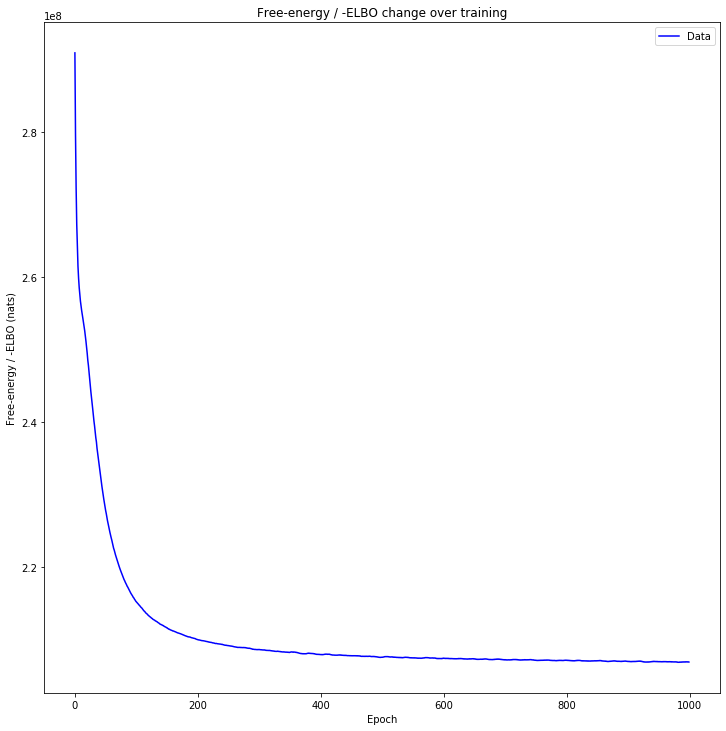

In [11]:
utils.plot_losses(losses)

In [12]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-4}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=100,
                    train_globals=False, blocks_filter=haxby_db.inference_filter(training=False))

01/24/2020 20:36:17 [Epoch 1] (789ms) Posterior free-energy 4.03181440e+07 = KL from prior 8.77243438e+04 - log-likelihood -4.02304200e+07
01/24/2020 20:36:17 Saving checkpoint...
01/24/2020 20:36:18 [Epoch 2] (781ms) Posterior free-energy 3.97697720e+07 = KL from prior 8.73125703e+04 - log-likelihood -3.96824560e+07
01/24/2020 20:36:19 [Epoch 3] (778ms) Posterior free-energy 3.98189280e+07 = KL from prior 8.72625469e+04 - log-likelihood -3.97316640e+07
01/24/2020 20:36:19 [Epoch 4] (779ms) Posterior free-energy 3.95879120e+07 = KL from prior 8.64877500e+04 - log-likelihood -3.95014280e+07
01/24/2020 20:36:20 [Epoch 5] (777ms) Posterior free-energy 3.92182640e+07 = KL from prior 8.55847344e+04 - log-likelihood -3.91326840e+07
01/24/2020 20:36:21 [Epoch 6] (773ms) Posterior free-energy 3.90196080e+07 = KL from prior 8.50386016e+04 - log-likelihood -3.89345680e+07
01/24/2020 20:36:22 [Epoch 7] (772ms) Posterior free-energy 3.86919600e+07 = KL from prior 8.46298594e+04 - log-likelihood -3

01/24/2020 20:37:03 [Epoch 60] (762ms) Posterior free-energy 3.04567020e+07 = KL from prior 7.38434062e+04 - log-likelihood -3.03828580e+07
01/24/2020 20:37:04 [Epoch 61] (767ms) Posterior free-energy 3.04711000e+07 = KL from prior 7.42234062e+04 - log-likelihood -3.03968760e+07
01/24/2020 20:37:04 [Epoch 62] (765ms) Posterior free-energy 3.03493600e+07 = KL from prior 7.41086719e+04 - log-likelihood -3.02752480e+07
01/24/2020 20:37:05 [Epoch 63] (769ms) Posterior free-energy 3.02418700e+07 = KL from prior 7.38111484e+04 - log-likelihood -3.01680600e+07
01/24/2020 20:37:06 [Epoch 64] (769ms) Posterior free-energy 3.01308320e+07 = KL from prior 7.43349297e+04 - log-likelihood -3.00564960e+07
01/24/2020 20:37:07 [Epoch 65] (771ms) Posterior free-energy 3.00552760e+07 = KL from prior 7.45482188e+04 - log-likelihood -2.99807260e+07
01/24/2020 20:37:07 [Epoch 66] (766ms) Posterior free-energy 3.00115600e+07 = KL from prior 7.45543594e+04 - log-likelihood -2.99370040e+07
01/24/2020 20:37:08 

01/24/2020 20:37:48 [Epoch 119] (770ms) Posterior free-energy 2.72284980e+07 = KL from prior 8.06748906e+04 - log-likelihood -2.71478240e+07
01/24/2020 20:37:49 [Epoch 120] (863ms) Posterior free-energy 2.71783800e+07 = KL from prior 8.06327891e+04 - log-likelihood -2.70977520e+07
01/24/2020 20:37:50 [Epoch 121] (774ms) Posterior free-energy 2.71517560e+07 = KL from prior 8.09158594e+04 - log-likelihood -2.70708400e+07
01/24/2020 20:37:51 [Epoch 122] (761ms) Posterior free-energy 2.71597800e+07 = KL from prior 8.09102188e+04 - log-likelihood -2.70788680e+07
01/24/2020 20:37:52 [Epoch 123] (760ms) Posterior free-energy 2.71148000e+07 = KL from prior 8.14498594e+04 - log-likelihood -2.70333500e+07
01/24/2020 20:37:52 [Epoch 124] (768ms) Posterior free-energy 2.70251400e+07 = KL from prior 8.12204922e+04 - log-likelihood -2.69439200e+07
01/24/2020 20:37:53 [Epoch 125] (769ms) Posterior free-energy 2.70184700e+07 = KL from prior 8.15843750e+04 - log-likelihood -2.69368880e+07
01/24/2020 20

01/24/2020 20:38:35 [Epoch 178] (794ms) Posterior free-energy 2.58395700e+07 = KL from prior 9.11147188e+04 - log-likelihood -2.57484560e+07
01/24/2020 20:38:35 [Epoch 179] (795ms) Posterior free-energy 2.58088680e+07 = KL from prior 9.12223125e+04 - log-likelihood -2.57176460e+07
01/24/2020 20:38:36 [Epoch 180] (790ms) Posterior free-energy 2.58460740e+07 = KL from prior 9.11079297e+04 - log-likelihood -2.57549680e+07
01/24/2020 20:38:37 [Epoch 181] (794ms) Posterior free-energy 2.58088800e+07 = KL from prior 9.14825547e+04 - log-likelihood -2.57173960e+07
01/24/2020 20:38:38 [Epoch 182] (793ms) Posterior free-energy 2.57714800e+07 = KL from prior 9.16645703e+04 - log-likelihood -2.56798160e+07
01/24/2020 20:38:39 [Epoch 183] (795ms) Posterior free-energy 2.57729600e+07 = KL from prior 9.17315625e+04 - log-likelihood -2.56812280e+07
01/24/2020 20:38:39 [Epoch 184] (789ms) Posterior free-energy 2.57529040e+07 = KL from prior 9.17686562e+04 - log-likelihood -2.56611360e+07
01/24/2020 20

01/24/2020 20:39:21 [Epoch 236] (792ms) Posterior free-energy 2.51893600e+07 = KL from prior 1.00781875e+05 - log-likelihood -2.50885800e+07
01/24/2020 20:39:22 [Epoch 237] (795ms) Posterior free-energy 2.51663980e+07 = KL from prior 1.00968016e+05 - log-likelihood -2.50654320e+07
01/24/2020 20:39:23 [Epoch 238] (867ms) Posterior free-energy 2.51767400e+07 = KL from prior 1.00933555e+05 - log-likelihood -2.50758100e+07
01/24/2020 20:39:23 [Epoch 239] (794ms) Posterior free-energy 2.51593940e+07 = KL from prior 1.00950312e+05 - log-likelihood -2.50584440e+07
01/24/2020 20:39:24 [Epoch 240] (792ms) Posterior free-energy 2.51810620e+07 = KL from prior 1.01117828e+05 - log-likelihood -2.50799460e+07
01/24/2020 20:39:25 [Epoch 241] (790ms) Posterior free-energy 2.51549520e+07 = KL from prior 1.00865547e+05 - log-likelihood -2.50540880e+07
01/24/2020 20:39:26 [Epoch 242] (786ms) Posterior free-energy 2.51506300e+07 = KL from prior 1.01457688e+05 - log-likelihood -2.50491720e+07
01/24/2020 20

01/24/2020 20:40:08 [Epoch 295] (765ms) Posterior free-energy 2.48452580e+07 = KL from prior 1.08998391e+05 - log-likelihood -2.47362640e+07
01/24/2020 20:40:08 [Epoch 296] (765ms) Posterior free-energy 2.48389220e+07 = KL from prior 1.09151125e+05 - log-likelihood -2.47297720e+07
01/24/2020 20:40:09 [Epoch 297] (764ms) Posterior free-energy 2.48303600e+07 = KL from prior 1.09111625e+05 - log-likelihood -2.47212480e+07
01/24/2020 20:40:10 [Epoch 298] (768ms) Posterior free-energy 2.48469120e+07 = KL from prior 1.09087000e+05 - log-likelihood -2.47378240e+07
01/24/2020 20:40:11 [Epoch 299] (766ms) Posterior free-energy 2.48095440e+07 = KL from prior 1.09396781e+05 - log-likelihood -2.47001460e+07
01/24/2020 20:40:12 [Epoch 300] (771ms) Posterior free-energy 2.48272080e+07 = KL from prior 1.09512703e+05 - log-likelihood -2.47176960e+07
01/24/2020 20:40:12 [Epoch 301] (888ms) Posterior free-energy 2.48127840e+07 = KL from prior 1.09460234e+05 - log-likelihood -2.47033240e+07
01/24/2020 20

01/24/2020 20:40:53 [Epoch 353] (764ms) Posterior free-energy 2.46221760e+07 = KL from prior 1.15540391e+05 - log-likelihood -2.45066400e+07
01/24/2020 20:40:53 [Epoch 354] (769ms) Posterior free-energy 2.46304280e+07 = KL from prior 1.15422312e+05 - log-likelihood -2.45150060e+07
01/24/2020 20:40:54 [Epoch 355] (771ms) Posterior free-energy 2.46206040e+07 = KL from prior 1.16140422e+05 - log-likelihood -2.45044620e+07
01/24/2020 20:40:55 [Epoch 356] (771ms) Posterior free-energy 2.46069820e+07 = KL from prior 1.16141242e+05 - log-likelihood -2.44908400e+07
01/24/2020 20:40:56 [Epoch 357] (764ms) Posterior free-energy 2.46234160e+07 = KL from prior 1.16218312e+05 - log-likelihood -2.45071980e+07
01/24/2020 20:40:57 [Epoch 358] (811ms) Posterior free-energy 2.46088240e+07 = KL from prior 1.16205914e+05 - log-likelihood -2.44926160e+07
01/24/2020 20:40:57 [Epoch 359] (765ms) Posterior free-energy 2.46125020e+07 = KL from prior 1.16342688e+05 - log-likelihood -2.44961600e+07
01/24/2020 20

01/24/2020 20:41:38 [Epoch 411] (804ms) Posterior free-energy 2.44825840e+07 = KL from prior 1.21634195e+05 - log-likelihood -2.43609460e+07
01/24/2020 20:41:39 [Epoch 412] (802ms) Posterior free-energy 2.44913660e+07 = KL from prior 1.21743711e+05 - log-likelihood -2.43696200e+07
01/24/2020 20:41:40 [Epoch 413] (804ms) Posterior free-energy 2.44927680e+07 = KL from prior 1.21401688e+05 - log-likelihood -2.43713680e+07
01/24/2020 20:41:41 [Epoch 414] (804ms) Posterior free-energy 2.44803620e+07 = KL from prior 1.21824281e+05 - log-likelihood -2.43585360e+07
01/24/2020 20:41:42 [Epoch 415] (802ms) Posterior free-energy 2.44827240e+07 = KL from prior 1.21884234e+05 - log-likelihood -2.43608420e+07
01/24/2020 20:41:42 [Epoch 416] (797ms) Posterior free-energy 2.44772740e+07 = KL from prior 1.21989844e+05 - log-likelihood -2.43552840e+07
01/24/2020 20:41:43 [Epoch 417] (854ms) Posterior free-energy 2.44782260e+07 = KL from prior 1.22242203e+05 - log-likelihood -2.43559860e+07
01/24/2020 20

01/24/2020 20:42:26 [Epoch 470] (790ms) Posterior free-energy 2.43952260e+07 = KL from prior 1.26089555e+05 - log-likelihood -2.42691360e+07
01/24/2020 20:42:26 [Epoch 471] (789ms) Posterior free-energy 2.43972420e+07 = KL from prior 1.26410141e+05 - log-likelihood -2.42708320e+07
01/24/2020 20:42:27 [Epoch 472] (790ms) Posterior free-energy 2.43985120e+07 = KL from prior 1.26435945e+05 - log-likelihood -2.42720780e+07
01/24/2020 20:42:28 [Epoch 473] (791ms) Posterior free-energy 2.44006840e+07 = KL from prior 1.26494562e+05 - log-likelihood -2.42741900e+07
01/24/2020 20:42:29 [Epoch 474] (791ms) Posterior free-energy 2.43945700e+07 = KL from prior 1.26437070e+05 - log-likelihood -2.42681320e+07
01/24/2020 20:42:30 [Epoch 475] (815ms) Posterior free-energy 2.43975840e+07 = KL from prior 1.26736938e+05 - log-likelihood -2.42708480e+07
01/24/2020 20:42:30 [Epoch 476] (783ms) Posterior free-energy 2.43931560e+07 = KL from prior 1.26698977e+05 - log-likelihood -2.42664580e+07
01/24/2020 20

01/24/2020 20:43:12 [Epoch 528] (794ms) Posterior free-energy 2.43345700e+07 = KL from prior 1.30498477e+05 - log-likelihood -2.42040700e+07
01/24/2020 20:43:13 [Epoch 529] (789ms) Posterior free-energy 2.43366280e+07 = KL from prior 1.30794961e+05 - log-likelihood -2.42058340e+07
01/24/2020 20:43:13 [Epoch 530] (790ms) Posterior free-energy 2.43275320e+07 = KL from prior 1.30587984e+05 - log-likelihood -2.41969440e+07
01/24/2020 20:43:14 [Epoch 531] (792ms) Posterior free-energy 2.43291680e+07 = KL from prior 1.30953234e+05 - log-likelihood -2.41982140e+07
01/24/2020 20:43:15 [Epoch 532] (792ms) Posterior free-energy 2.43327500e+07 = KL from prior 1.30528391e+05 - log-likelihood -2.42022200e+07
01/24/2020 20:43:16 [Epoch 533] (794ms) Posterior free-energy 2.43310800e+07 = KL from prior 1.31011016e+05 - log-likelihood -2.42000680e+07
01/24/2020 20:43:17 [Epoch 534] (798ms) Posterior free-energy 2.43270000e+07 = KL from prior 1.30814758e+05 - log-likelihood -2.41961860e+07
01/24/2020 20

01/24/2020 20:43:59 [Epoch 587] (784ms) Posterior free-energy 2.42852860e+07 = KL from prior 1.34271359e+05 - log-likelihood -2.41510140e+07
01/24/2020 20:44:00 [Epoch 588] (791ms) Posterior free-energy 2.42837940e+07 = KL from prior 1.34206844e+05 - log-likelihood -2.41495880e+07
01/24/2020 20:44:00 [Epoch 589] (781ms) Posterior free-energy 2.42814120e+07 = KL from prior 1.34559672e+05 - log-likelihood -2.41468520e+07
01/24/2020 20:44:01 [Epoch 590] (792ms) Posterior free-energy 2.42833900e+07 = KL from prior 1.34626641e+05 - log-likelihood -2.41487640e+07
01/24/2020 20:44:02 [Epoch 591] (784ms) Posterior free-energy 2.42805160e+07 = KL from prior 1.34711484e+05 - log-likelihood -2.41458040e+07
01/24/2020 20:44:03 [Epoch 592] (793ms) Posterior free-energy 2.42811040e+07 = KL from prior 1.34638094e+05 - log-likelihood -2.41464680e+07
01/24/2020 20:44:04 [Epoch 593] (792ms) Posterior free-energy 2.42765500e+07 = KL from prior 1.34869281e+05 - log-likelihood -2.41416800e+07
01/24/2020 20

01/24/2020 20:44:45 [Epoch 645] (761ms) Posterior free-energy 2.42463240e+07 = KL from prior 1.37558297e+05 - log-likelihood -2.41087640e+07
01/24/2020 20:44:46 [Epoch 646] (769ms) Posterior free-energy 2.42452520e+07 = KL from prior 1.37626906e+05 - log-likelihood -2.41076220e+07
01/24/2020 20:44:46 [Epoch 647] (768ms) Posterior free-energy 2.42436720e+07 = KL from prior 1.37533109e+05 - log-likelihood -2.41061400e+07
01/24/2020 20:44:47 [Epoch 648] (769ms) Posterior free-energy 2.42480940e+07 = KL from prior 1.37528016e+05 - log-likelihood -2.41105660e+07
01/24/2020 20:44:48 [Epoch 649] (772ms) Posterior free-energy 2.42439660e+07 = KL from prior 1.37881969e+05 - log-likelihood -2.41060840e+07
01/24/2020 20:44:49 [Epoch 650] (767ms) Posterior free-energy 2.42415380e+07 = KL from prior 1.37856375e+05 - log-likelihood -2.41036820e+07
01/24/2020 20:44:50 [Epoch 651] (766ms) Posterior free-energy 2.42381060e+07 = KL from prior 1.37752719e+05 - log-likelihood -2.41003560e+07
01/24/2020 20

01/24/2020 20:45:30 [Epoch 703] (785ms) Posterior free-energy 2.42188820e+07 = KL from prior 1.39968578e+05 - log-likelihood -2.40789120e+07
01/24/2020 20:45:31 [Epoch 704] (765ms) Posterior free-energy 2.42200220e+07 = KL from prior 1.39938281e+05 - log-likelihood -2.40800820e+07
01/24/2020 20:45:31 [Epoch 705] (768ms) Posterior free-energy 2.42173060e+07 = KL from prior 1.40223281e+05 - log-likelihood -2.40770820e+07
01/24/2020 20:45:32 [Epoch 706] (770ms) Posterior free-energy 2.42162580e+07 = KL from prior 1.40514672e+05 - log-likelihood -2.40757440e+07
01/24/2020 20:45:33 [Epoch 707] (789ms) Posterior free-energy 2.42220760e+07 = KL from prior 1.40285656e+05 - log-likelihood -2.40817920e+07
01/24/2020 20:45:34 [Epoch 708] (789ms) Posterior free-energy 2.42183540e+07 = KL from prior 1.40305875e+05 - log-likelihood -2.40780480e+07
01/24/2020 20:45:35 [Epoch 709] (810ms) Posterior free-energy 2.42188380e+07 = KL from prior 1.40506750e+05 - log-likelihood -2.40783300e+07
01/24/2020 20

01/24/2020 20:46:16 [Epoch 762] (763ms) Posterior free-energy 2.41935100e+07 = KL from prior 1.42962625e+05 - log-likelihood -2.40505480e+07
01/24/2020 20:46:17 [Epoch 763] (765ms) Posterior free-energy 2.41941600e+07 = KL from prior 1.42818375e+05 - log-likelihood -2.40513400e+07
01/24/2020 20:46:17 [Epoch 764] (768ms) Posterior free-energy 2.41925080e+07 = KL from prior 1.43056094e+05 - log-likelihood -2.40494540e+07
01/24/2020 20:46:18 [Epoch 765] (770ms) Posterior free-energy 2.41980120e+07 = KL from prior 1.42917875e+05 - log-likelihood -2.40550920e+07
01/24/2020 20:46:19 [Epoch 766] (773ms) Posterior free-energy 2.41962080e+07 = KL from prior 1.42968234e+05 - log-likelihood -2.40532420e+07
01/24/2020 20:46:20 [Epoch 767] (768ms) Posterior free-energy 2.41962720e+07 = KL from prior 1.42743328e+05 - log-likelihood -2.40535300e+07
01/24/2020 20:46:20 [Epoch 768] (770ms) Posterior free-energy 2.41928620e+07 = KL from prior 1.43253031e+05 - log-likelihood -2.40496080e+07
01/24/2020 20

01/24/2020 20:47:01 [Epoch 820] (770ms) Posterior free-energy 2.41786440e+07 = KL from prior 1.44808062e+05 - log-likelihood -2.40338380e+07
01/24/2020 20:47:02 [Epoch 821] (809ms) Posterior free-energy 2.41813200e+07 = KL from prior 1.45162812e+05 - log-likelihood -2.40361600e+07
01/24/2020 20:47:02 [Epoch 822] (776ms) Posterior free-energy 2.41755420e+07 = KL from prior 1.44969672e+05 - log-likelihood -2.40305720e+07
01/24/2020 20:47:03 [Epoch 823] (762ms) Posterior free-energy 2.41788240e+07 = KL from prior 1.44870422e+05 - log-likelihood -2.40339560e+07
01/24/2020 20:47:04 [Epoch 824] (767ms) Posterior free-energy 2.41753800e+07 = KL from prior 1.45574125e+05 - log-likelihood -2.40298040e+07
01/24/2020 20:47:05 [Epoch 825] (771ms) Posterior free-energy 2.41782940e+07 = KL from prior 1.45469250e+05 - log-likelihood -2.40328240e+07
01/24/2020 20:47:06 [Epoch 826] (775ms) Posterior free-energy 2.41749420e+07 = KL from prior 1.45223125e+05 - log-likelihood -2.40297200e+07
01/24/2020 20

01/24/2020 20:47:47 [Epoch 879] (770ms) Posterior free-energy 2.41632560e+07 = KL from prior 1.46856656e+05 - log-likelihood -2.40164000e+07
01/24/2020 20:47:47 [Epoch 880] (790ms) Posterior free-energy 2.41626960e+07 = KL from prior 1.47341922e+05 - log-likelihood -2.40153540e+07
01/24/2020 20:47:48 [Epoch 881] (766ms) Posterior free-energy 2.41621600e+07 = KL from prior 1.47041641e+05 - log-likelihood -2.40151180e+07
01/24/2020 20:47:49 [Epoch 882] (762ms) Posterior free-energy 2.41614460e+07 = KL from prior 1.47018609e+05 - log-likelihood -2.40144260e+07
01/24/2020 20:47:50 [Epoch 883] (811ms) Posterior free-energy 2.41608940e+07 = KL from prior 1.47325547e+05 - log-likelihood -2.40135700e+07
01/24/2020 20:47:51 [Epoch 884] (767ms) Posterior free-energy 2.41590860e+07 = KL from prior 1.47141719e+05 - log-likelihood -2.40119440e+07
01/24/2020 20:47:51 [Epoch 885] (870ms) Posterior free-energy 2.41630280e+07 = KL from prior 1.47144359e+05 - log-likelihood -2.40158860e+07
01/24/2020 20

01/24/2020 20:48:32 [Epoch 937] (789ms) Posterior free-energy 2.41519760e+07 = KL from prior 1.49031141e+05 - log-likelihood -2.40029460e+07
01/24/2020 20:48:33 [Epoch 938] (764ms) Posterior free-energy 2.41443580e+07 = KL from prior 1.48871406e+05 - log-likelihood -2.39954880e+07
01/24/2020 20:48:34 [Epoch 939] (766ms) Posterior free-energy 2.41469800e+07 = KL from prior 1.49231750e+05 - log-likelihood -2.39977480e+07
01/24/2020 20:48:34 [Epoch 940] (784ms) Posterior free-energy 2.41489640e+07 = KL from prior 1.49268109e+05 - log-likelihood -2.39996940e+07
01/24/2020 20:48:35 [Epoch 941] (767ms) Posterior free-energy 2.41484260e+07 = KL from prior 1.49026984e+05 - log-likelihood -2.39993980e+07
01/24/2020 20:48:36 [Epoch 942] (837ms) Posterior free-energy 2.41439960e+07 = KL from prior 1.48991625e+05 - log-likelihood -2.39950040e+07
01/24/2020 20:48:37 [Epoch 943] (769ms) Posterior free-energy 2.41453720e+07 = KL from prior 1.49088344e+05 - log-likelihood -2.39962840e+07
01/24/2020 20

01/24/2020 20:49:18 [Epoch 996] (769ms) Posterior free-energy 2.41393600e+07 = KL from prior 1.50667891e+05 - log-likelihood -2.39886920e+07
01/24/2020 20:49:19 [Epoch 997] (771ms) Posterior free-energy 2.41375940e+07 = KL from prior 1.50576453e+05 - log-likelihood -2.39870180e+07
01/24/2020 20:49:20 [Epoch 998] (768ms) Posterior free-energy 2.41372100e+07 = KL from prior 1.51215125e+05 - log-likelihood -2.39859960e+07
01/24/2020 20:49:20 [Epoch 999] (767ms) Posterior free-energy 2.41370280e+07 = KL from prior 1.51086906e+05 - log-likelihood -2.39859420e+07
01/24/2020 20:49:21 [Epoch 1000] (790ms) Posterior free-energy 2.41390080e+07 = KL from prior 1.50825781e+05 - log-likelihood -2.39881840e+07
01/24/2020 20:49:21 Saving checkpoint...


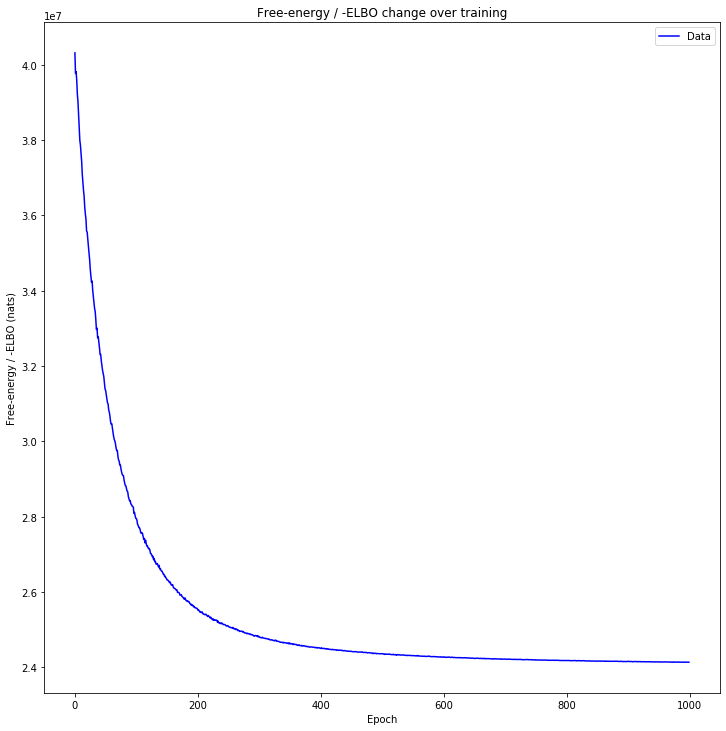

In [13]:
utils.plot_losses(losses)

In [14]:
def task_labeler(task):
    
    return task


def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

/home/zulqarnain/develop/htfatorch/htfa_torch/utils.py:147: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


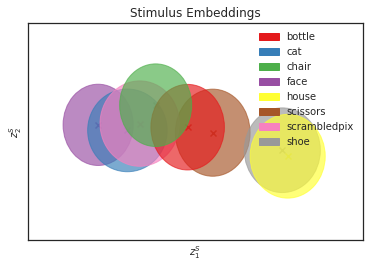

In [15]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Set1',
                            filename='haxby_norest_task_embedding.pdf')

In [16]:
def subject_labeler(subject):
    return 'Subject %d' % subject

/home/zulqarnain/develop/htfatorch/htfa_torch/utils.py:147: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


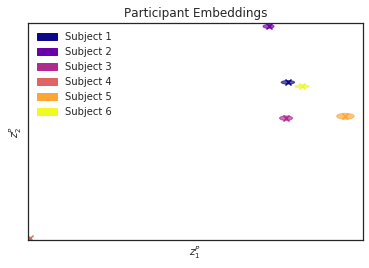

In [17]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

In [18]:
def block_task_labeler(b):
    task = b.task
    return task


01/24/2020 20:49:22 Plotting factors for Participant 6, run 8


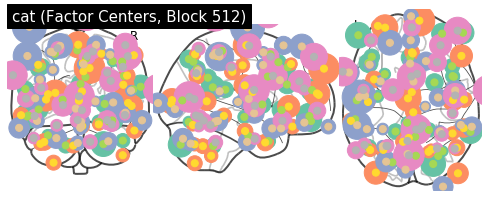

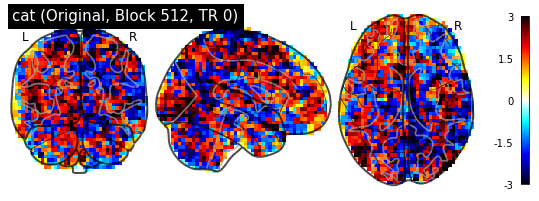

01/24/2020 20:49:24 Reconstruction Error (Frobenius Norm): 1.10979836e+02 out of 6.34683105e+02


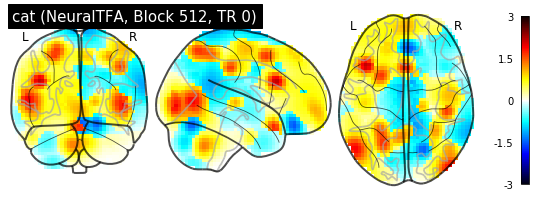

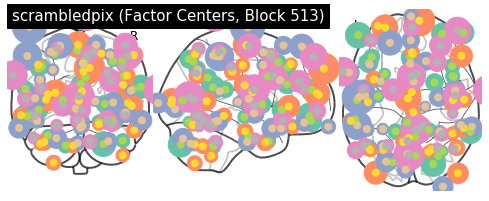

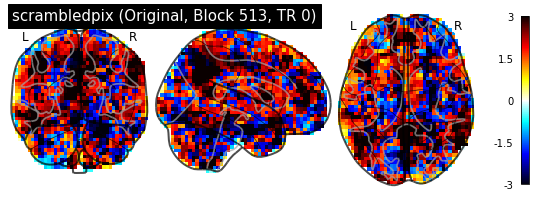

01/24/2020 20:49:27 Reconstruction Error (Frobenius Norm): 1.26250694e+02 out of 5.72112305e+02


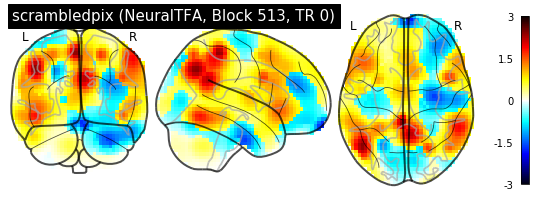

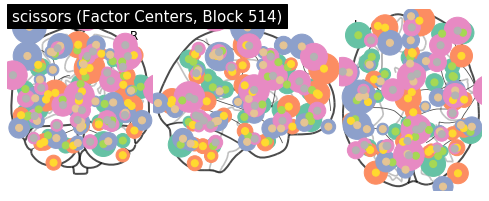

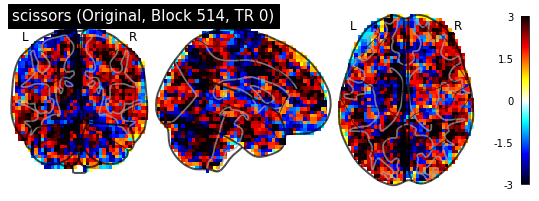

01/24/2020 20:49:30 Reconstruction Error (Frobenius Norm): 1.32116241e+02 out of 6.23831787e+02


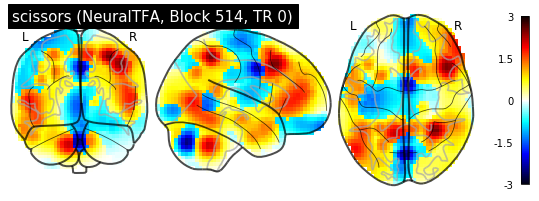

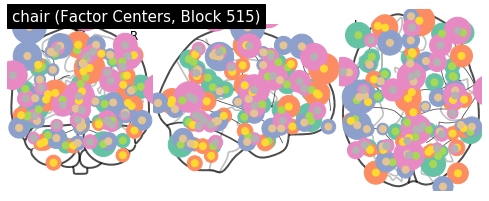

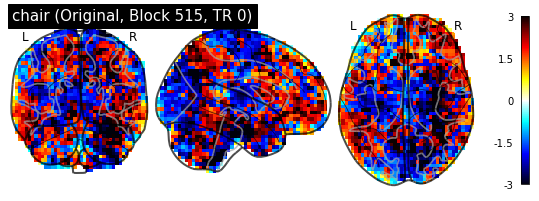

01/24/2020 20:49:33 Reconstruction Error (Frobenius Norm): 1.07434830e+02 out of 5.63255432e+02


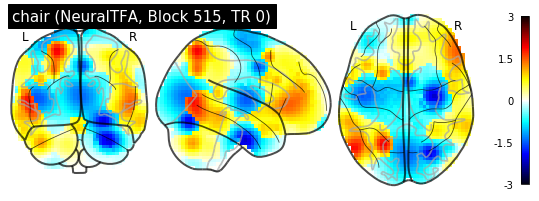

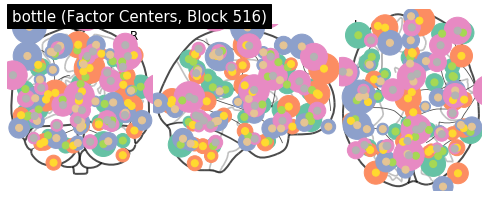

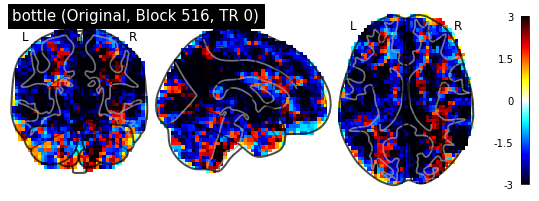

01/24/2020 20:49:36 Reconstruction Error (Frobenius Norm): 1.47115448e+02 out of 7.39638733e+02


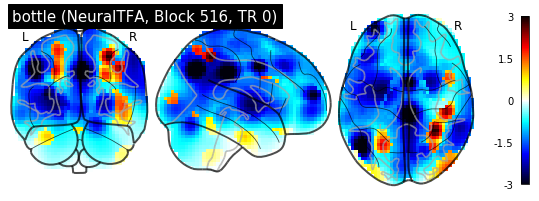

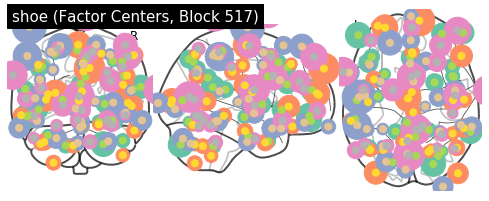

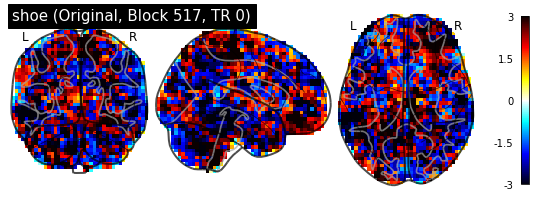

01/24/2020 20:49:38 Reconstruction Error (Frobenius Norm): 1.24573761e+02 out of 5.71527283e+02


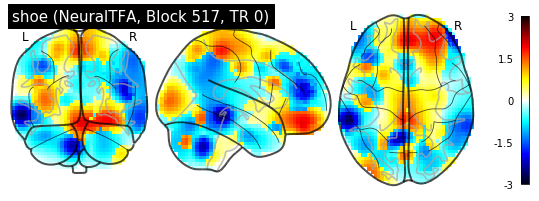

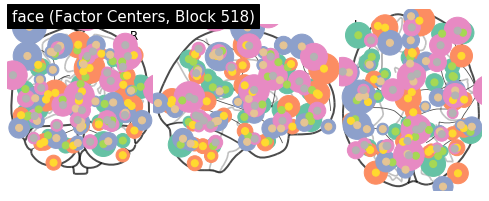

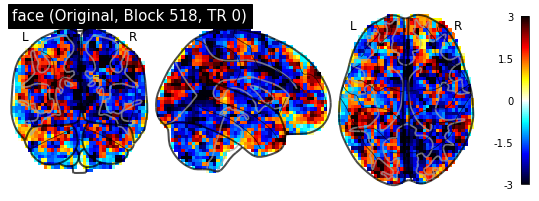

01/24/2020 20:49:41 Reconstruction Error (Frobenius Norm): 1.16782104e+02 out of 5.92858643e+02


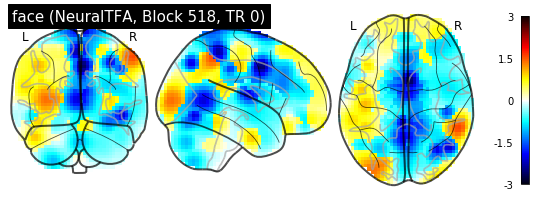

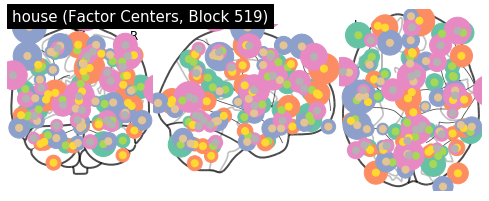

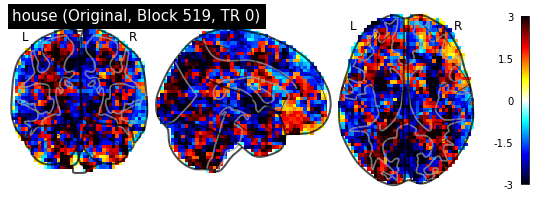

01/24/2020 20:49:44 Reconstruction Error (Frobenius Norm): 1.05870117e+02 out of 6.20795837e+02


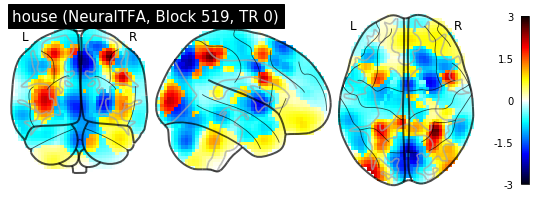

In [19]:
subject_runs = set([(block.subject, block.run) for block in dtfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in dtfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = dtfa._blocks.index(block)
        dtfa.plot_factor_centers(index, labeler=block_task_labeler)
        dtfa.plot_original_brain(index, labeler=block_task_labeler)
        dtfa.plot_reconstruction(index, labeler=block_task_labeler)


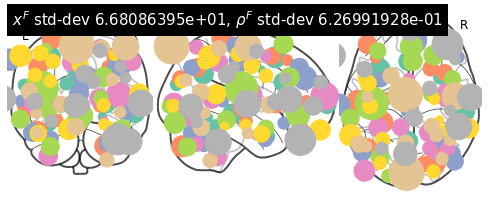

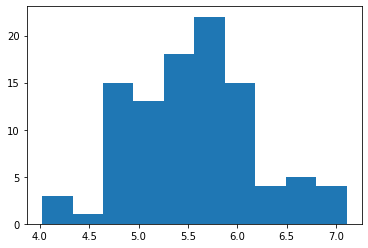

(<nilearn.plotting.displays.OrthoProjector at 0x7f8f8d618f50>,
 tensor([[-5.8921e+01, -2.8905e+01,  2.1592e+01],
         [ 3.8142e+01, -5.8388e+01, -2.4249e+01],
         [ 4.4019e+01,  1.8191e+00,  3.8058e+01],
         [ 2.7246e+01,  7.0588e+01,  1.6387e+00],
         [-2.3389e+00, -5.9412e+01,  3.3745e+01],
         [-3.2618e+01,  2.4479e+01,  4.0436e+00],
         [-3.1552e+01, -4.7218e+01, -2.0282e+01],
         [-3.2006e+01,  1.6095e+01,  5.1426e+01],
         [ 5.7819e+01, -2.8806e+01, -7.7530e+00],
         [ 2.3292e+01, -5.4203e+01, -1.1984e+01],
         [-1.9477e+00,  2.4558e+01,  2.5178e+01],
         [-1.4757e+01, -8.7956e+01,  2.2781e+01],
         [ 3.2424e+01,  7.8785e+00, -3.2056e+01],
         [-2.4419e+01, -1.4578e+01, -1.5754e+01],
         [ 2.9094e+01, -6.4734e+01,  4.1166e+01],
         [-4.4569e+01, -6.6343e+01,  4.0386e+01],
         [ 4.3034e+01,  4.8686e+01,  2.9949e+00],
         [ 2.1775e+01,  1.7038e+01,  9.7000e-01],
         [ 2.6439e+01, -8.1919e+01, -

In [20]:
dtfa.visualize_factor_embedding()

In [21]:
dtfa.average_reconstruction_error()

01/24/2020 20:49:57 Average reconstruction error (MSE): 9.44237419e-01
01/24/2020 20:49:57 Average data norm (Euclidean): 1.12463532e+00
01/24/2020 20:49:57 Percent average reconstruction error: 0.472454


(0.9442374189053911, 1.1246353237994886, 0.004724538094296528)

In [22]:
dtfa.average_reconstruction_error(weighted=False)

01/24/2020 20:50:09 Average reconstruction error (MSE): 5.07057947e+02 +/- 3.92195068e+01
01/24/2020 20:50:09 Average data norm (Euclidean): 6.02641826e+02 +/- 6.11461625e+01
01/24/2020 20:50:09 Percent average reconstruction error: 84.379758 +/- 3.19527039e+00


(array([564.7532959 , 540.012146  , 502.75735474, 514.25317383,
        530.57196045, 513.73516846, 518.94622803, 490.14852905,
        561.55511475, 529.34936523, 501.9793396 , 451.81481934,
        473.66287231, 489.64825439, 553.23791504, 544.75982666,
        503.67712402, 499.59033203, 472.56506348, 506.70935059,
        482.05227661, 535.46154785, 502.51870728, 513.41430664,
        619.472229  , 554.26623535, 514.72808838, 536.61309814,
        481.56835938, 517.02709961, 519.64697266, 478.70755005,
        591.96234131, 530.36206055, 471.10113525, 496.21295166,
        535.89880371, 495.28631592, 512.52734375, 543.35302734,
        602.00262451, 502.82437134, 500.34573364, 525.30578613,
        529.5123291 , 511.36782837, 545.97143555, 492.85836792,
        527.19250488, 535.75268555, 487.52301025, 458.88607788,
        509.74743652, 556.55456543, 521.43322754, 551.59838867,
        455.22851562, 451.83517456, 470.13891602, 449.4286499 ,
        464.63543701, 468.58807373, 434.